In [1]:
from eval_plots import *

In [2]:
df = (get_plot_df(["EA", "base", "bible", "Zwa"], len_data=10))
df

,size,adapters,ppl
0,8B,base,39.993184
1,8B,EA,55.946963
2,8B,bible,38.946303
3,70B,base,31.141793
4,70B,EA,38.990055
5,70B,bible,28.573392
6,8B,Zwa,30.479864


In [28]:
def plot_ppl(data):
    """
    Plots PPL values by size and adapter with a horizontal baseline for the "base" adapter,
    and separate subplots for each size. Includes a unified legend.

    Parameters:
    - data: pandas DataFrame containing 'size', 'adapters', and 'ppl' columns.
    """
    unique_sizes = data['size'].unique()
    fig, axes = plt.subplots(1, len(unique_sizes), figsize=(10, 6), sharey=True)

    colors = {adapter: uzh_colors[i % len(uzh_colors)] for i, adapter in enumerate(data['adapters'].unique())}
    
    # Dictionary to store handles for legend
    legend_handles = {}

    for ax, size in zip(axes, unique_sizes):
        # Subset the data for the current size
        size_data = data[data['size'] == size]
        
        # Extract "base" adapter's PPL for the horizontal line
        base_ppl = size_data[size_data['adapters'] == 'base']['ppl'].values[0]
        base_line = ax.hlines(
            y=base_ppl,
            xmin=-0.5,
            xmax=len(size_data['adapters'].unique()) - 1,
            colors=colors['base'],
            label="Base"
        )
        if "Base" not in legend_handles:
            legend_handles["Base"] = base_line
        
        # Filter non-"base" adapters
        non_base_adapters = size_data[size_data['adapters'] != 'base']
        num_non_base_adapters = len(non_base_adapters)
        bar_width = 0.8 # 0.8 / num_non_base_adapters if num_non_base_adapters > 0 else 0.8
        
        # Create bars for non-"base" adapters
        for i, adapter in enumerate(non_base_adapters['adapters'].unique()):
            adapter_data = non_base_adapters[non_base_adapters['adapters'] == adapter]
            bar = ax.bar(
                [i],
                adapter_data['ppl'],
                bar_width,
                color=colors[adapter],
                alpha=0.9
            )
            if adapter not in legend_handles:  # Collect handles only once
                legend_handles[adapter] = bar[0]
        
        # Configure the x-axis for this subplot
        ax.set_xticks([i for i in range(len(non_base_adapters['adapters'].unique()))])
        ax.set_xticklabels(non_base_adapters['adapters'].unique(), rotation=45)
        ax.set_title(f"Size: {size}")
        ax.set_xlabel("Adapters")
        ax.set_ylabel("PPL" if size == unique_sizes[0] else "")
        ax.grid(True, axis="y", linestyle='--', alpha=0.6)
    
      # Add a single shared legend at the bottom
    fig.legend(
        handles=legend_handles.values(),
        labels=legend_handles.keys(),
        title="Adapters",
        loc='lower center',
        ncol=len(legend_handles),  # Arrange legend in a single row
        bbox_to_anchor=(0.5, -0.1)
    )
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()




In [3]:
df = (get_plot_df(["EA", "base", "bible", "Zwa", "test"], len_data=10))

df

,size,adapters,ppl
0,8B,base,39.993184
1,8B,EA,55.946963
2,8B,bible,38.946303
3,70B,base,31.141793
4,70B,EA,38.990055
5,70B,bible,28.573392
6,8B,Zwa,30.479864


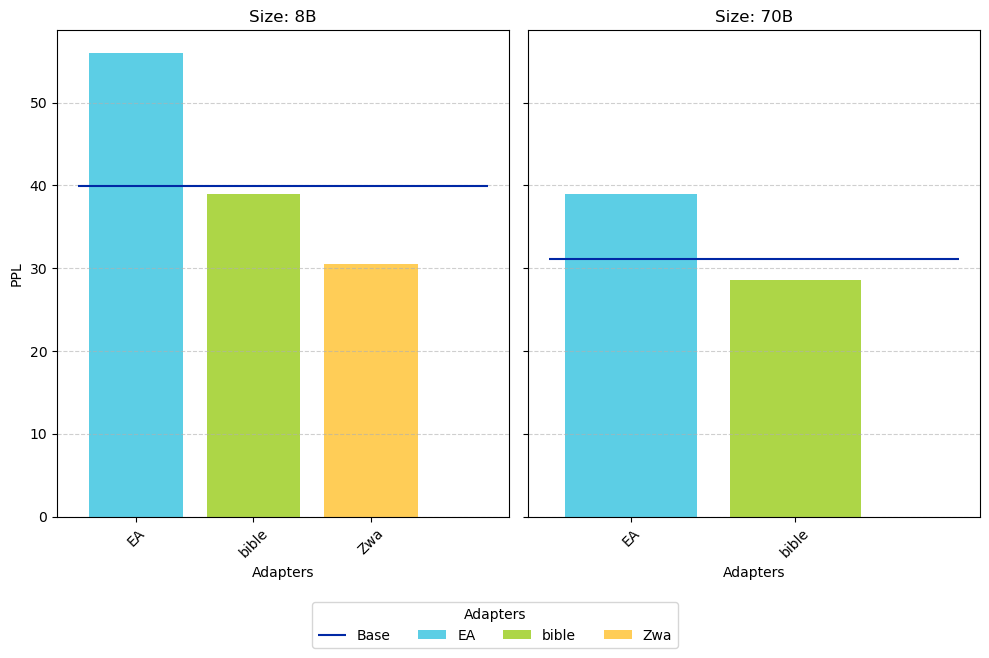

In [29]:
plot_ppl(df)